<a href="https://colab.research.google.com/github/Chaksome/Machine-Learning-Mnist/blob/main/myAblationExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import numpy as np
import random
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [28]:
batch_size = 128#设置batchsize
nb_classes = 10
nb_epoch = 16#设置epoch
img_rows, img_cols = 28, 28
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#visulization
mu = 0
sigma = 100

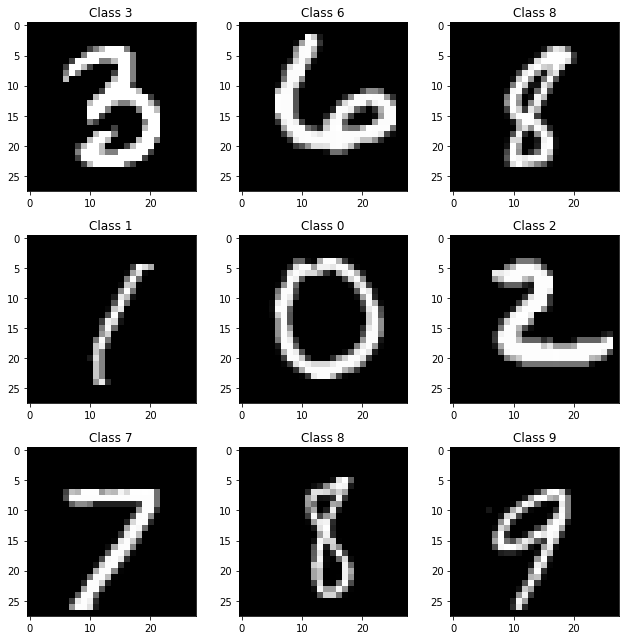

In [29]:
plt.rcParams['figure.figsize'] = (9,9) #图形可视化

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train));
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [31]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
input_shape = (img_rows, img_cols//2,1)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()
input_shape = X_train.shape[1:]
model.add(layers.Conv2D(28,kernel_size=3,activation='relu',input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(28,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(28,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(56,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

Pairs of Convolution-subsampling

In [22]:
# 卷积层数分别为1、2、3
batch_size = 128
nb_classes = 10
nb_epoch = 30
input_shape = (28,28,1)
nums = 3
model = [0] * nums

for j in range(3):
  model[j] = Sequential()
  model[j].add(layers.Conv2D(28,kernel_size=(5,5),padding='same',activation='relu',input_shape=input_shape))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  
  if j >=1:
    model[j].add(layers.Conv2D(28*2,kernel_size=(5,5),padding='same',activation='relu'))
    model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  if j >=2:
    model[j].add(layers.Conv2D(28*4,kernel_size=(5,5),padding='same',activation='relu'))
    model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  model[j].add(Flatten())
  model[j].add(layers.Dense(256, activation='relu'))
  model[j].add(layers.Dense(10, activation='softmax'))
  model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
  model[j].summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 28, 28, 28)        728       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 5488)              0         
                                                                 
 dense_67 (Dense)            (None, 256)               1405184   
                                                                 
 dense_68 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,408,482
Trainable params: 1,408,482
Non-trainable params: 0
___________________________________________

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
history0 = model[0].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history1 = model[1].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history2 = model[2].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history3 = model[3].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
#history4 = model[4].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
#         verbose=1, validation_data=(X_test, Y_test))
plt.plot(history0.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
#plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.show()

Epoch 1/30
469/469 [==============================] - 46s 96ms/step - loss: 0.1841 - accuracy: 0.9461 - val_loss: 0.0604 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 45s 96ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0486 - val_accuracy: 0.9841 - lr: 9.5000e-04
Epoch 3/30
469/469 [==============================] - 45s 96ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0402 - val_accuracy: 0.9865 - lr: 9.0250e-04
Epoch 4/30
469/469 [==============================] - 45s 96ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0376 - val_accuracy: 0.9871 - lr: 8.5737e-04
Epoch 5/30
469/469 [==============================] - 46s 99ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0420 - val_accuracy: 0.9861 - lr: 8.1451e-04
Epoch 6/30
469/469 [==============================] - 45s 95ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0365 - val_accuracy: 0.9895 - lr: 7.7378e-04
Epoch 7/30
469/469 [==================

IndexError: ignored

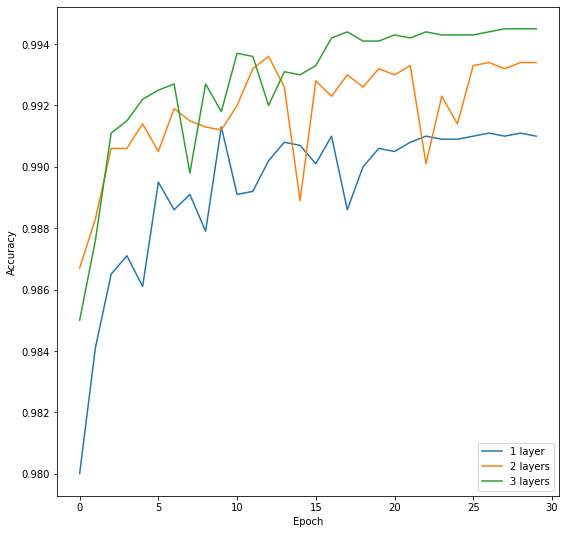

In [ ]:
plt.plot(history0.history['val_accuracy'], label = '1 layer')
plt.plot(history1.history['val_accuracy'], label = '2 layers')
plt.plot(history2.history['val_accuracy'], label = '3 layers')
#plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.show()

Num of Filters

In [15]:
# 卷积核数分别为20、24、28、32、36
batch_size = 128
nb_classes = 10
nb_epoch = 20
input_shape = (28,28,1)
nums = 5
model = [0] * nums

for j in range(5):
  model[j] = Sequential()
  model[j].add(layers.Conv2D(20+j*4,kernel_size=(5,5),padding='same',activation='relu',input_shape=input_shape))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  model[j].add(layers.Conv2D(40+j*8,kernel_size=(5,5),padding='same',activation='relu'))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))

  model[j].add(Flatten())
  model[j].add(layers.Dense(256, activation='relu'))
  model[j].add(layers.Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  model[j].summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 40)        20040     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 40)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1960)              0         
                                                                 
 dense_20 (Dense)            (None, 256)             

Hidden Layer

In [24]:
# 隐藏层组元个数分别为64、128、256、512、1024
batch_size = 128
nb_classes = 10
nb_epoch = 20
input_shape = (28,28,1)
nums = 5
model = [0] * nums

for j in range(5):
  model[j] = Sequential()
  model[j].add(layers.Conv2D(28,kernel_size=(5,5),padding='same',activation='relu',input_shape=input_shape))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  model[j].add(layers.Conv2D(56,kernel_size=(5,5),padding='same',activation='relu'))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2),padding='same'))
  model[j].add(Flatten())
  model[j].add(layers.Dense(2**(6+j), activation='relu'))
  model[j].add(layers.Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  model[j].summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 28, 28, 28)        728       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 14, 14, 56)        39256     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 7, 7, 56)         0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 2744)              0         
                                                                 
 dense_73 (Dense)            (None, 64)              

Dropout

In [ ]:
# 设置随机失活概率分别为0.2、0.3 0.4 0.5 0.6
batch_size = 128
nb_classes = 10
nb_epoch = 20
input_shape = X_train.shape[1:]
nums = 5
model = [0] * nums

for j in range(5):
  model[j] = Sequential()
  model[j].add(layers.Conv2D(28,kernel_size=(5,5),activation='relu',padding = 'same',input_shape=input_shape))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2)))
  model[j].add(layers.Dropout(0.2+0.1*j))
  model[j].add(layers.Conv2D(56,kernel_size=(5,5),activation='relu',padding = 'same'))
  model[j].add(layers.MaxPooling2D(pool_size=(2,2)))
  model[j].add(layers.Dropout(0.2+0.1*j))
  model[j].add(layers.Flatten())
  model[j].add(layers.Dense(256, activation='relu'))
  model[j].add(layers.Dropout(0.2+0.1*j))
  model[j].add(layers.Dense(10, activation='softmax'))
  model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
  model[j].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 28)        728       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 28)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 56)        39256     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 56)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 56)         

Epoch 1/20
469/469 [==============================] - 126s 266ms/step - loss: 0.1830 - accuracy: 0.9422 - val_loss: 0.0375 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 122s 261ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0290 - val_accuracy: 0.9902 - lr: 9.5000e-04
Epoch 3/20
469/469 [==============================] - 122s 260ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0235 - val_accuracy: 0.9931 - lr: 9.0250e-04
Epoch 4/20
469/469 [==============================] - 122s 261ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0243 - val_accuracy: 0.9916 - lr: 8.5737e-04
Epoch 5/20
469/469 [==============================] - 122s 261ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0231 - val_accuracy: 0.9925 - lr: 8.1451e-04
Epoch 6/20
469/469 [==============================] - 123s 261ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0203 - val_accuracy: 0.9933 - lr: 7.7378e-04
Epoch 7/20
469/469 [======

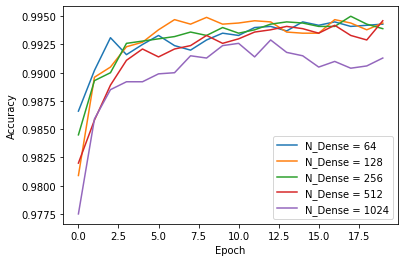

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
history0 = model[0].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history1 = model[1].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history2 = model[2].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history3 = model[3].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
history4 = model[4].fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
         verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer])
plt.plot(history0.history['val_accuracy'], label = 'N_Dense = 64')
plt.plot(history1.history['val_accuracy'], label = 'N_Dense = 128')
plt.plot(history2.history['val_accuracy'], label = 'N_Dense = 256')
plt.plot(history3.history['val_accuracy'], label = 'N_Dense = 512')
plt.plot(history4.history['val_accuracy'], label = 'N_Dense = 1024')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.show()

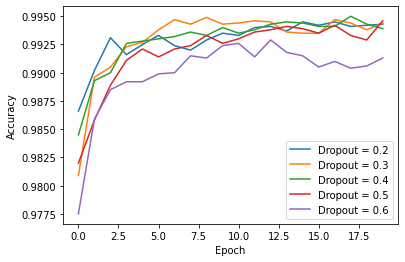

In [ ]:
plt.plot(history0.history['val_accuracy'], label = 'Dropout = 0.2')
plt.plot(history1.history['val_accuracy'], label = 'Dropout = 0.3')
plt.plot(history2.history['val_accuracy'], label = 'Dropout = 0.4')
plt.plot(history3.history['val_accuracy'], label = 'Dropout = 0.5')
plt.plot(history4.history['val_accuracy'], label = 'Dropout = 0.6')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.show()

Non-linear and Normalization

In [35]:
# 研究将卷积层分为两个连续卷积层带来的影响，以及归一化的优化
batch_size = 128
nb_classes = 10
nb_epoch = 30
input_shape = (28,28,1)
nets = 5
model = [0] *nets

j=0 #origin
model[j] = Sequential()
model[j].add(layers.Conv2D(28,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model[j].add(layers.MaxPooling2D(pool_size=(2,2)))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Conv2D(56,kernel_size=(5,5),activation='relu',padding = 'same'))
model[j].add(layers.MaxPooling2D(pool_size=(2,2)))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Flatten())
model[j].add(layers.Dense(256, activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

j=1 #28C5->28C3+28C3
model[j] = Sequential()
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu'))
model[j].add(layers.MaxPooling2D((2,2)))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model[j].add(layers.MaxPooling2D((2,2)))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Flatten())
model[j].add(layers.Dense(256, activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()
j=2 #Maxpool->28C5S2
model[j] = Sequential()
model[j].add(layers.Conv2D(28,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(28,kernel_size=5,strides=2,activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Conv2D(56,kernel_size=(5,5),activation='relu',padding = 'same'))
model[j].add(layers.Conv2D(56,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Flatten())
model[j].add(layers.Dense(256, activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()
j=3#both
model[j] = Sequential()
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu'))
model[j].add(layers.Conv2D(28,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model[j].add(layers.Conv2D(56,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Flatten())
model[j].add(layers.Dense(256, activation='relu'))
model[j].add(layers.Dropout(0.4))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()
j=4#both+BN
model[j] = Sequential()
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu',input_shape=input_shape))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(28,kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(28,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
#model[j].add(layers.Dropout(0.4))
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
#model[j].add(layers.Dropout(0.4))
model[j].add(layers.Flatten())
model[j].add(layers.Dense(256, activation='relu'))
#model[j].add(layers.Dropout(0.4))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_277 (Conv2D)         (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 12, 12, 28)       0         
 ng2D)                                                           
                                                                 
 dropout_123 (Dropout)       (None, 12, 12, 28)        0         
                                                                 
 conv2d_278 (Conv2D)         (None, 12, 12, 56)        39256     
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 6, 6, 56)         0         
 ng2D)                                                           
                                                                 
 dropout_124 (Dropout)       (None, 6, 6, 56)        

Learning Rate

In [ ]:
#采用指数衰减学习率，初值分别为1\1e-1\1e-2\1e-3\1e-4
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
annealer0 = LearningRateScheduler(lambda x: 1 * 0.95 ** x, verbose=0)
history0 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, 
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer0])
annealer1 = LearningRateScheduler(lambda x: 1e-1 * 0.95 ** x, verbose=0)
history1 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer1])
annealer2 = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** x, verbose=0)
history2 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer2])
annealer3 = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
history3 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer3])
annealer4 = LearningRateScheduler(lambda x: 1e-4 * 0.95 ** x, verbose=0)
history4 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
         verbose=1, validation_data=(X_test, Y_test),callbacks=[annealer4])
plt.plot(history0.history['val_accuracy'], label = 'lr = 1e-1')
plt.plot(history1.history['val_accuracy'], label = 'lr = 1e-2')
plt.plot(history2.history['val_accuracy'], label = 'lr = 1e-3')
plt.plot(history3.history['val_accuracy'], label = 'lr = 1e-4')
plt.plot(history4.history['val_accuracy'], label = 'lr = 1e-5')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.show()